/Users/pedro_victor/anaconda3/lib/python3.11/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


Calculando rota de Minha Casa para Midway...


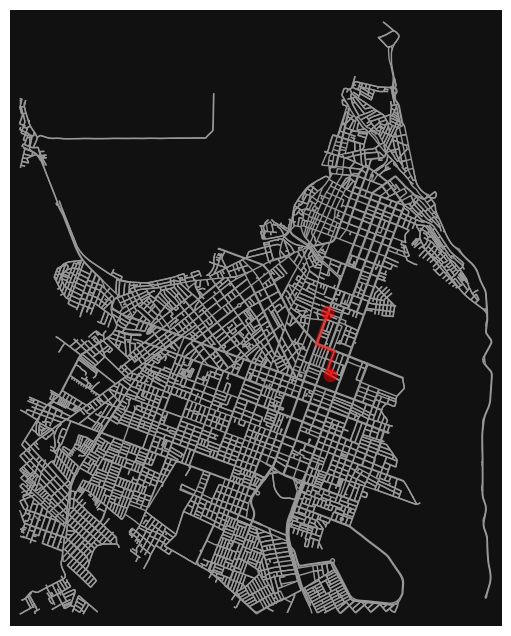

<Figure size 640x480 with 0 Axes>

Calculando rota de Midway para Casa da Namorada...


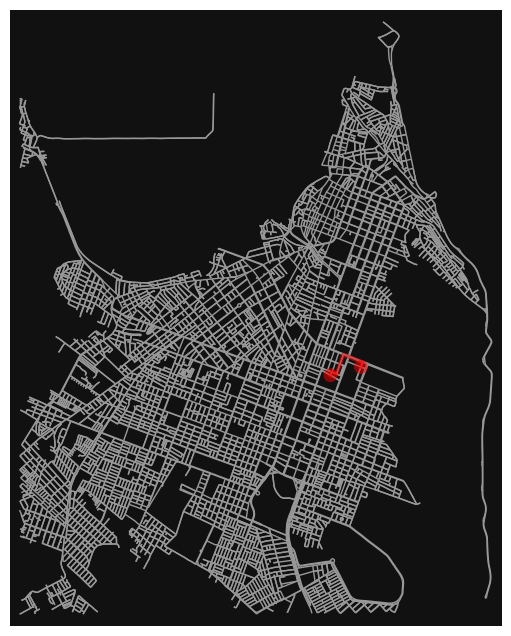

<Figure size 640x480 with 0 Axes>

Calculando rota de Casa da Namorada para Minha Casa...


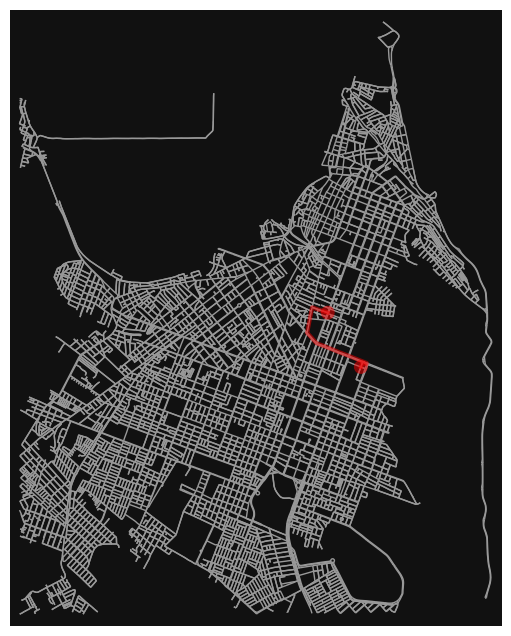

<Figure size 640x480 with 0 Axes>

Calculando rota de DCA para Minha Casa...


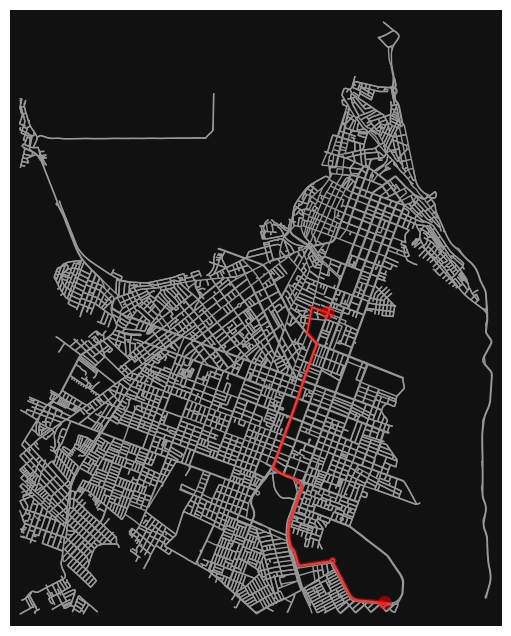

<Figure size 640x480 with 0 Axes>

Calculando rota de ECT para Casa de Vó...


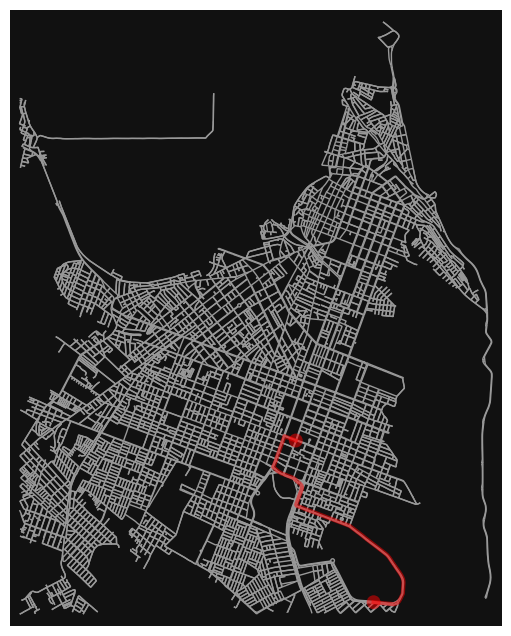

<Figure size 640x480 with 0 Axes>

Calculando rota de Casa de Vó para Vesthosp...


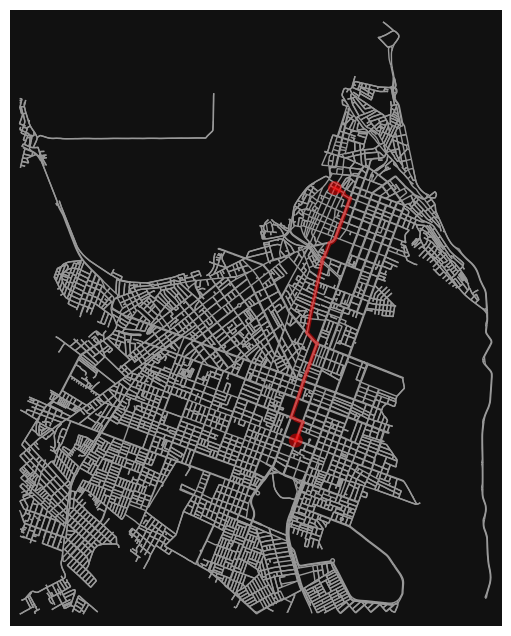

<Figure size 640x480 with 0 Axes>

Calculando rota de Vesthosp para Minha Casa...


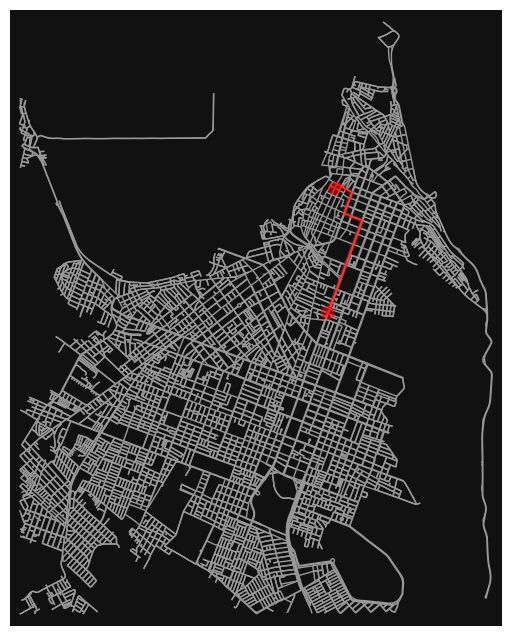

<Figure size 640x480 with 0 Axes>

Calculando rota de DCA para Vesthosp...


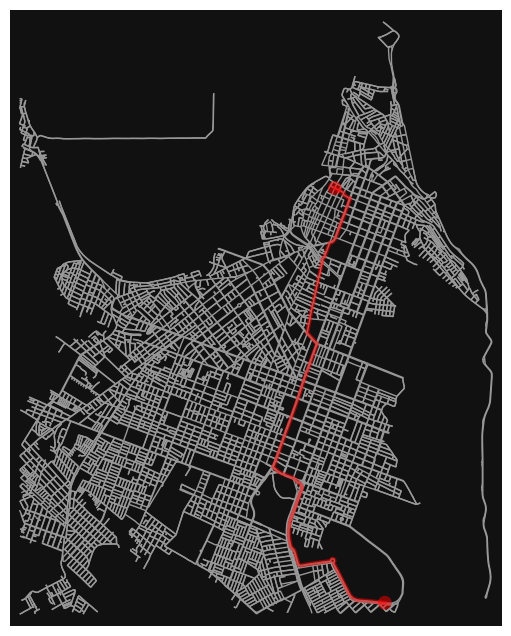

<Figure size 640x480 with 0 Axes>

Calculando rota de Midway para ECT...


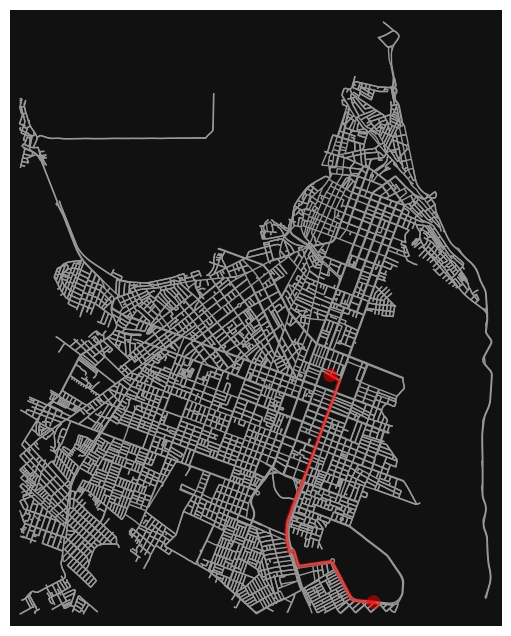

<Figure size 640x480 with 0 Axes>

Calculando rota de Minha Casa para Casa de Vó...


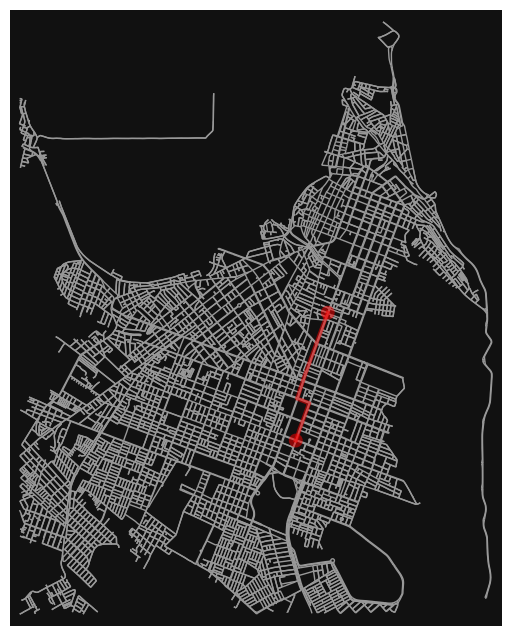

<Figure size 640x480 with 0 Axes>

In [10]:
import heapq
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Configure OSMnx
ox.settings.use_cache = True
ox.settings.log_console = True

# Coordenadas dos pontos de interesse
locations = {
    "Minha Casa": (-5.800599508947651, -35.206925674334684),
    "Midway": (-5.810896030636198, -35.206348200159326),
    "Casa da Namorada": (-5.809421534902807, -35.2016377950458),
    "DCA": (-5.842870143233271, -35.197310236740044),
    "ECT": (-5.843378581884456, -35.19939757290338),
    "Casa de Vó": (-5.819847884661806, -35.21167141270225),
    "Vesthosp": (-5.7826047930669215, -35.20486484624309)
}

# Função para obter o grafo de Natal-RN com um raio de 10 km
def get_graph_from_city(center_point, dist=5000):
        G = ox.graph_from_point(center_point, dist=dist, network_type='drive')
        return G

# Função para encontrar o nó mais próximo no grafo para uma coordenada
def get_nearest_node(G, coord):
    return ox.nearest_nodes(G, coord[1], coord[0])

# Função principal
def main():
    # Ponto central de Natal (coordenadas de "Minha Casa")
    center_point = locations["Minha Casa"]

    # Obter o grafo de Natal-RN com raio de 10 km
    G = get_graph_from_city(center_point)
    if G is None:
        return

    # Mapear coordenadas para nós mais próximos
    nodes = {name: get_nearest_node(G, coord) for name, coord in locations.items()}

    # Criar pares de origem e destino
    pairs = [
        ("Minha Casa", "Midway"),
        ("Midway", "Casa da Namorada"),
        ("Casa da Namorada", "Minha Casa"),
        ("DCA", "Minha Casa"),
        ("ECT", "Casa de Vó"),
        ("Casa de Vó", "Vesthosp"),
        ("Vesthosp", "Minha Casa"),
        ("DCA", "Vesthosp"),
        ("Midway", "ECT"),
        ("Minha Casa", "Casa de Vó")
    ]
    i=1
    # Executar e visualizar Dijkstra para cada par
    for origin, destination in pairs:
        print(f"Calculando rota de {origin} para {destination}...")
        origin_node = nodes[origin]
        destination_node = nodes[destination]
        shortest_path = nx.shortest_path(G, source=origin_node, target=destination_node, weight='length')
        ox.plot_graph_route(G, shortest_path, route_linewidth=3, node_size=0)
        plt.show()
        i += 1 
if __name__ == "__main__":
    main()